In [2]:
import os
import pandas as pd

In [3]:
dirname = os.getcwd()
dataset_path = os.path.join(dirname, 'data/spotify_classification/data.csv')

In [4]:
df = pd.read_csv(dataset_path, header=None, skiprows=1, index_col='Index',
                names=["Index","Acousticness","Danceability","Duration MS","Energy","Instrumentalness","Key",
                       "Liveness","Loudness","Mode","Speechiness","Tempo","Time Signature","Valence","User Liked",
                       "Song Title","Artist"])
target_column = "User Liked"
df.head(5)

,Acousticness,Danceability,Duration MS,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,User Liked,Song Title,Artist
Index,,,,,,,,,,,,,,,,
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
print(f"Number of rows: {df.shape[0]} Number of columns: {df.shape[1]}")
df.describe()

Number of rows: 2017 Number of columns: 16


,Acousticness,Danceability,Duration MS,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,User Liked
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


### Replace basic categorical values with strings

In [6]:
df = df.replace(to_replace = 
               {
                   "Key": {-1:'No key',
                          0:'C',
                          1:'C#',
                          2:'D',
                          3:'D#',
                          4:'E',
                          5:'F',
                          6:'F#',
                          7:'G',
                          8:'G#',
                          9:'A',
                          10:'A#',
                          11:'B'},
                   "Mode": {0:'Minor',
                           1:'Major'},
                   "Time Signature": {1:'1/4',
                                     3:'3/4',
                                     4:'4/4',
                                     5:'5/4',
                                     6:'6/4',
                                     7:'7/4'},
                   "User Liked": {0:'No',
                                 1:'Yes'}
               })

### Cleaning string values from any leading or trailing whitespaces:

In [7]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

### Describing the features based on type

In [8]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 10 numerical features: 

['Acousticness', 'Danceability', 'Duration MS', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']


In [9]:
categorical_features = df.select_dtypes(exclude='number').columns.tolist()
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 6 categorical features: 

['Key', 'Mode', 'Time Signature', 'User Liked', 'Song Title', 'Artist']


### Check out unique categorical values

In [10]:
for col in categorical_features:
    print(f"Unique values in the '{col}' column:", '\n')
    print(df[col].value_counts(), '\n')

Unique values in the 'Key' column: 

C#    257
C     216
G     212
A     191
B     187
D     184
F     166
F#    159
A#    141
G#    136
E     105
D#     63
Name: Key, dtype: int64 

Unique values in the 'Mode' column: 

Major    1235
Minor     782
Name: Mode, dtype: int64 

Unique values in the 'Time Signature' column: 

4/4    1891
3/4      93
5/4      32
1/4       1
Name: Time Signature, dtype: int64 

Unique values in the 'User Liked' column: 

Yes    1020
No      997
Name: User Liked, dtype: int64 

Unique values in the 'Song Title' column: 

River                 3
Jack                  3
Mask Off              2
Be My Baby            2
Oblivion              2
                     ..
L'Amour Parfait       1
I Follow Rivers       1
From Nowhere          1
I Need You            1
I Wanna Get Better    1
Name: Song Title, Length: 1956, dtype: int64 

Unique values in the 'Artist' column: 

Drake                16
Rick Ross            13
Disclosure           12
WALK THE MOON        10

## Dropping unique or close to unique columns

In [11]:
df = df.drop(columns=['Song Title','Artist'])
categorical_features.remove('Song Title')
categorical_features.remove('Artist')

## Data visualization

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Histograms

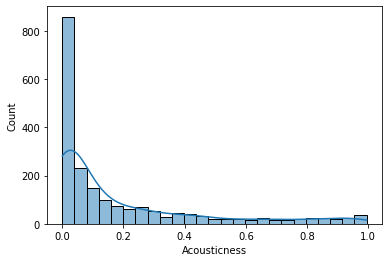

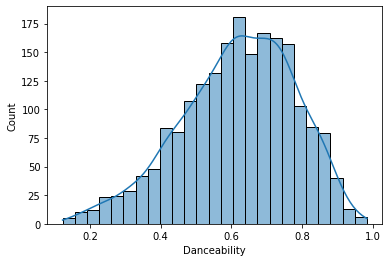

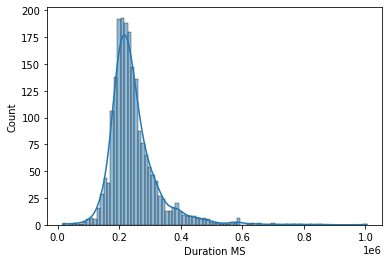

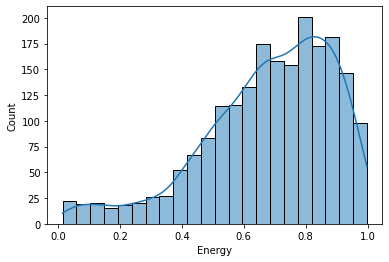

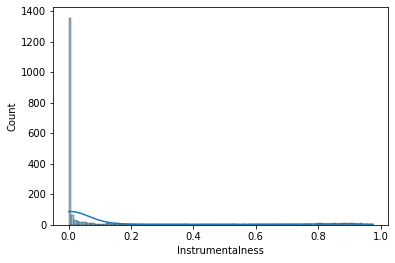

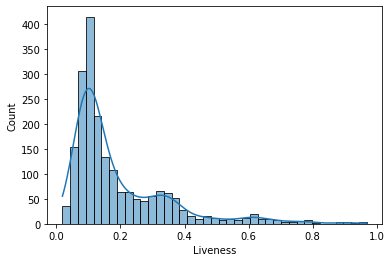

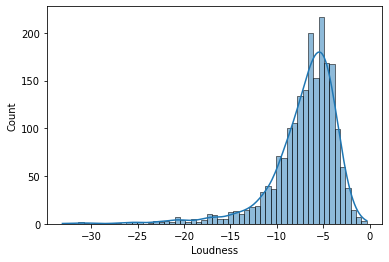

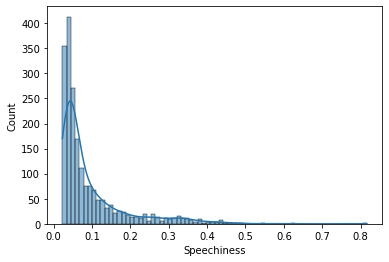

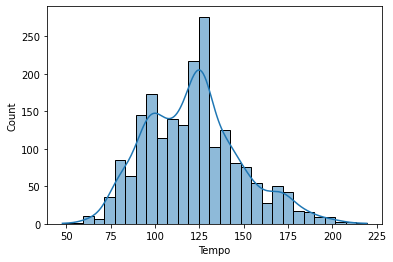

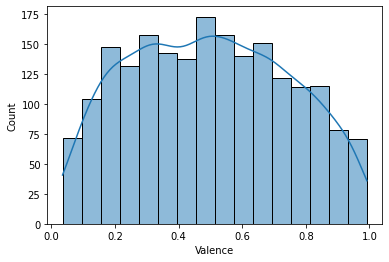

In [13]:
for col in numerical_features:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)

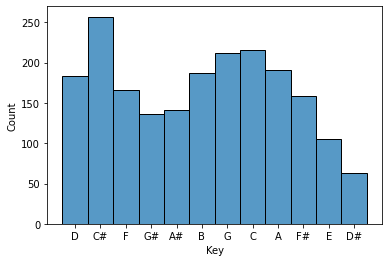

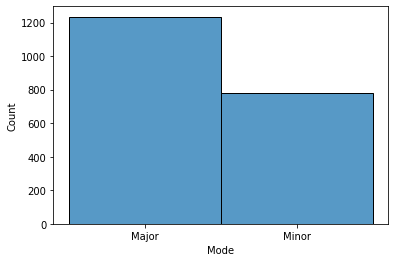

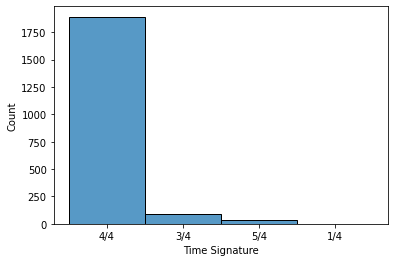

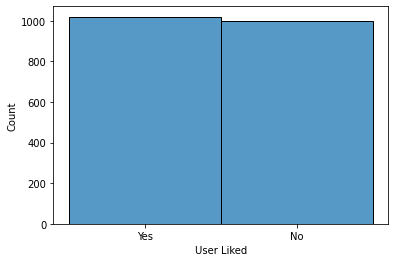

In [14]:
for col in categorical_features:
    plt.figure()
    sns.histplot(data=df, x=col)

# Prepare dataframes for testing

In [15]:
#Create a dictionary to hold all values
dfs_touse = {}
dfs_touse['df'] = df

## Working with missing values

In [16]:
columnsWithMissing = df.isnull().sum() > 0

print("Columns with missing values: ")
df.isnull().sum()[columnsWithMissing]

Columns with missing values: 


Series([], dtype: int64)

### There are no missing values.

## Discretization of certain columns

In [17]:
def discretize(df: pd.DataFrame):
    def checkSpeech(val):
        if val <= 0.33:
            return 'Music'
        if val > 0.66:
            return 'Speech'
        else:
            return 'Speech & Music'
    def checkLive(val):
        if val >= 0.8:
             return 'Yes'
        else:
             return 'No'
    def checkInstrumental(val):
        if val > 0.5:
             return 'Yes'
        else:
             return 'No'
            
    newDf = df.copy()
    newDf['Speechiness'] = newDf['Speechiness'].map(checkSpeech)
    newDf['Liveness'] = newDf['Liveness'].map(checkLive)
    newDf['Instrumentalness'] = newDf['Instrumentalness'].map(checkInstrumental)
    
    return newDf

In [18]:
discreteDf = discretize(df)

### Check out the discrete results

In [19]:
disc_numerical_features = discreteDf.select_dtypes(include='number').columns.tolist()
print(f'There are {len(disc_numerical_features)} numerical features:', '\n')
print(disc_numerical_features)

There are 7 numerical features: 

['Acousticness', 'Danceability', 'Duration MS', 'Energy', 'Loudness', 'Tempo', 'Valence']


In [20]:
disc_categorical_features = discreteDf.select_dtypes(exclude='number').columns.tolist()
print(f'There are {len(disc_categorical_features)} categorical features:', '\n')
print(disc_categorical_features)

There are 7 categorical features: 

['Instrumentalness', 'Key', 'Liveness', 'Mode', 'Speechiness', 'Time Signature', 'User Liked']


In [21]:
for col in disc_categorical_features:
    print(f"Unique values in the '{col}' column:", '\n')
    print(discreteDf[col].value_counts(), '\n')

Unique values in the 'Instrumentalness' column: 

No     1742
Yes     275
Name: Instrumentalness, dtype: int64 

Unique values in the 'Key' column: 

C#    257
C     216
G     212
A     191
B     187
D     184
F     166
F#    159
A#    141
G#    136
E     105
D#     63
Name: Key, dtype: int64 

Unique values in the 'Liveness' column: 

No     2005
Yes      12
Name: Liveness, dtype: int64 

Unique values in the 'Mode' column: 

Major    1235
Minor     782
Name: Mode, dtype: int64 

Unique values in the 'Speechiness' column: 

Music             1939
Speech & Music      77
Speech               1
Name: Speechiness, dtype: int64 

Unique values in the 'Time Signature' column: 

4/4    1891
3/4      93
5/4      32
1/4       1
Name: Time Signature, dtype: int64 

Unique values in the 'User Liked' column: 

Yes    1020
No      997
Name: User Liked, dtype: int64 



In [22]:
#Remove the target column from cat feature lists
categorical_features.remove(target_column)
disc_categorical_features.remove(target_column)

In [23]:
#Helper functions for column names
def getnumfeats(dfkey: str):
    if 'disc' in key:
        return disc_numerical_features
    else:
        return numerical_features
    
def getcatfeats(dfkey: str):
    if 'disc' in key:
        return disc_categorical_features
    else:
        return categorical_features

In [24]:
#Add discretized df to dictionary
dfs_touse['df_disc'] = discreteDf

## Working with outliers

In [25]:
import OutlierDetection as out_det

In [26]:
outlierCounts = {}
print(f"Outliers:"," " * 18,"IQR ZScore ModZScore", '\n')
for col in numerical_features:
    outliersIQR = out_det.indicies_of_outliers(df[col])
    outliersZScore = out_det.outliers_z_score(df[col])
    outliersModZScore = out_det.outliers_modified_z_score(df[col])
    outlierCounts[col] = (outliersIQR, outliersZScore, outliersModZScore)
    print(f"Column '{col:16}': {len(outliersIQR):5} {len(outliersZScore):6} {len(outliersModZScore):9}")

Outliers:                    IQR ZScore ModZScore 

Column 'Acousticness    ':   194     24       366
Column 'Danceability    ':    12      2         0
Column 'Duration MS     ':   141     34        97
Column 'Energy          ':    54     15         0
Column 'Instrumentalness':   416      9       873
Column 'Liveness        ':   126     45       205
Column 'Loudness        ':   105     43        78
Column 'Speechiness     ':   209     46       289
Column 'Tempo           ':    15      5         1
Column 'Valence         ':     0      0         0


### Create dataframes with no outliers

In [27]:
newDfs = {}
for key,value in dfs_touse.items():
    newVal = value.copy()
    num_feat = getnumfeats(key)
    outRem = out_det.OutlierRemover('ZScore')
    newVal[num_feat] = outRem.fit_transform(newVal[num_feat])
    newVal = newVal.dropna()
    newDfs[key + '_dropoutl'] = newVal
dfs_touse.update(newDfs)

## Encode categorical features

In [28]:
#Define functions
def encode_cat(df: pd.DataFrame, cat_features: list):
    #One Hot Encode all categorical features
    df = pd.get_dummies(df, columns=cat_features, drop_first=True)
    
    #Encode the target column
    df = df.replace({target_column: {'Yes':1, 'No':0}})
    
    return df

In [29]:
#Encode all
for key,value in dfs_touse.items():
    cat_feats = getcatfeats(key)
    dfs_touse[key] = encode_cat(value, cat_feats)

## Scaling numerical features

In [30]:
from sklearn import preprocessing as preproc

In [110]:
#Define scaling functions
def minmax_scale(dataframe: pd.DataFrame, columns_toscale: list):
    df = dataframe.copy()
    scaler = preproc.MinMaxScaler(feature_range=(0, 1))
    df[columns_toscale] = scaler.fit_transform(df[columns_toscale])
    return df               
               
def robust_scale(dataframe: pd.DataFrame, columns_toscale: list):
    df = dataframe.copy()
    rbst_scaler = preproc.RobustScaler()
    df[columns_toscale] = rbst_scaler.fit_transform(df[columns_toscale])
    return df

def standard_scale(dataframe: pd.DataFrame, columns_toscale: list):
    df = dataframe.copy()
    std_scaler = preproc.StandardScaler()
    df[columns_toscale] = std_scaler.fit_transform(df[columns_toscale])
    return df

def normalize_scale(dataframe: pd.DataFrame, columns_toscale: list):
    df = dataframe.copy()
    normalizer = preproc.Normalizer()
    df[columns_toscale] = normalizer.fit_transform(df[columns_toscale])
    return df

In [32]:
#Scale all
newDfs = {}
for key,value in dfs_touse.items():
    num_feats = getnumfeats(key)
    
    #MinMax scale the numerical features that are not already in the [0,1] range
    value = minmax_scale(value, ['Tempo','Loudness','Duration MS'])
    dfs_touse[key] = value
    
    newDfs[f'{key}_rbst'] = robust_scale(value, num_feats)
    newDfs[f'{key}_norm'] = normalize_scale(value, num_feats)
dfs_touse.update(newDfs)

## Check out the final list of datasets

In [33]:
#Sort the dictionary first
old_dict = dfs_touse
dfs_touse = {}

for key in sorted(old_dict):
    dfs_touse[key] = old_dict[key]

In [34]:
for key,value in dfs_touse.items():
    print(f"Dataset: {key}")

Dataset: df
Dataset: df_disc
Dataset: df_disc_dropoutl
Dataset: df_disc_dropoutl_norm
Dataset: df_disc_dropoutl_rbst
Dataset: df_disc_norm
Dataset: df_disc_rbst
Dataset: df_dropoutl
Dataset: df_dropoutl_norm
Dataset: df_dropoutl_rbst
Dataset: df_norm
Dataset: df_rbst


# Determining the optimal number of clusters

In [35]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, OPTICS, AgglomerativeClustering
from sklearn import metrics

### Single out dataframes

In [36]:
#Dataframe to experiment on
basic_df = dfs_touse['df'].drop(columns=[target_column])
norm_df = dfs_touse['df_norm'].drop(columns=[target_column])
dropoutl_df = dfs_touse['df_dropoutl'].drop(columns=[target_column])
dropoutl_norm_df = dfs_touse['df_dropoutl_norm'].drop(columns=[target_column])

### Trying the elbow method

#### KMeans

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

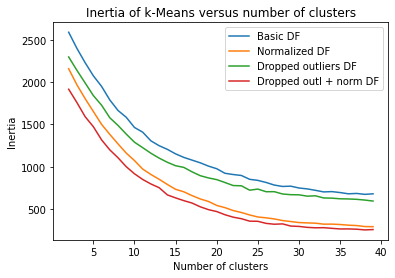

In [37]:
#Basic DF
scores = [KMeans(n_clusters=i+2).fit(basic_df).inertia_ 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Basic DF')

#Normalized DF
scores = [KMeans(n_clusters=i+2).fit(norm_df).inertia_ 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Normalized DF')

#Dropped outliers DF
scores = [KMeans(n_clusters=i+2).fit(dropoutl_df).inertia_ 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Dropped outliers DF')

#Dropped outliers + Normalized DF
scores = [KMeans(n_clusters=i+2).fit(dropoutl_norm_df).inertia_ 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Dropped outl + norm DF')

plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

### Trying the silhouette score

#### KMeans

Text(0.5, 1.0, 'Silhouette score of k-Means versus number of clusters')

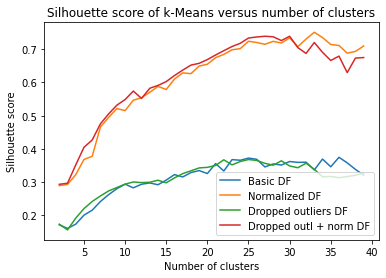

In [38]:
#Basic DF
scores = [metrics.silhouette_score(basic_df, KMeans(n_clusters=i+2).fit(basic_df).labels_) 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Basic DF')

#Normalized DF
scores = [metrics.silhouette_score(norm_df, KMeans(n_clusters=i+2).fit(norm_df).labels_, metric='cosine') 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Normalized DF')

#Dropped outliers DF
scores = [metrics.silhouette_score(dropoutl_df, KMeans(n_clusters=i+2).fit(dropoutl_df).labels_) 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Dropped outliers DF')

#Dropped outliers + normalized DF
scores = [metrics.silhouette_score(dropoutl_norm_df, KMeans(n_clusters=i+2).fit(dropoutl_norm_df).labels_, metric='cosine') 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Dropped outl + norm DF')

plt.xlabel('Number of clusters')
plt.ylabel("Silhouette score")
plt.title("Silhouette score of k-Means versus number of clusters")

#### OPTICS

Text(0.5, 1.0, 'Silhouette score of OPTICS versus number of clusters')

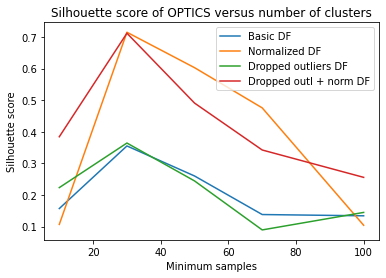

In [39]:
min_samples = [10,30,50,70,100]

#Basic DF
scores = [metrics.silhouette_score(basic_df, OPTICS(min_samples=i).fit(basic_df).labels_) 
          for i in min_samples]
sns.lineplot(x=min_samples, y=scores, label='Basic DF')

#Normalized DF
scores = [metrics.silhouette_score(norm_df, OPTICS(min_samples=i).fit(norm_df).labels_, metric='cosine') 
          for i in min_samples]
sns.lineplot(x=min_samples, y=scores, label='Normalized DF')

#Dropped outliers DF
scores = [metrics.silhouette_score(dropoutl_df, OPTICS(min_samples=i).fit(dropoutl_df).labels_) 
          for i in min_samples]
sns.lineplot(x=min_samples, y=scores, label='Dropped outliers DF')

#Dropped outliers + normalized DF
scores = [metrics.silhouette_score(dropoutl_norm_df, OPTICS(min_samples=i).fit(dropoutl_norm_df).labels_, metric='cosine') 
          for i in min_samples]
sns.lineplot(x=min_samples, y=scores, label='Dropped outl + norm DF')

plt.xlabel('Minimum samples')
plt.ylabel("Silhouette score")
plt.title("Silhouette score of OPTICS versus number of clusters")

In [40]:
trained_optics = OPTICS(min_samples=30).fit(basic_df)
unique_clusters = np.unique(trained_optics.labels_)
print('Number of clusters for the optimal number of minimal samples:')
print(f'Basic: {unique_clusters.size}')

trained_optics = OPTICS(min_samples=30).fit(norm_df)
unique_clusters = np.unique(trained_optics.labels_)
print(f'Normalized: {unique_clusters.size}')

trained_optics = OPTICS(min_samples=30).fit(dropoutl_df)
unique_clusters = np.unique(trained_optics.labels_)
print(f'Dropped outliers: {unique_clusters.size}')

trained_optics = OPTICS(min_samples=30).fit(dropoutl_norm_df)
unique_clusters = np.unique(trained_optics.labels_)
print(f'Dropped outliers and normalized: {unique_clusters.size}')

Number of clusters for the optimal number of minimal samples:
Basic: 23
Normalized: 25
Dropped outliers: 24
Dropped outliers and normalized: 24


#### DBSCAN

Couldn't process eps value: 0.2
Couldn't process eps value: 0.3
Couldn't process eps value: 0.2
Couldn't process eps value: 0.3


Text(0.5, 1.0, 'Silhouette score of DBSCAN versus eps')

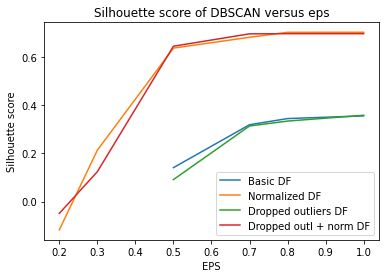

In [41]:
eps = [0.2,0.3,0.5,0.7,0.8,1]

#Basic DF
scores = {}
for eps_value in eps:
    try:
        score = metrics.silhouette_score(basic_df, DBSCAN(min_samples=30,eps=eps_value).fit(basic_df).labels_)
        scores[eps_value] = score
    except:
        print(f"Couldn't process eps value: {eps_value}")

sns.lineplot(x=scores.keys(), y=scores.values(), label='Basic DF')

#Normalized DF
scores = {}
for eps_value in eps:
    try:
        score = metrics.silhouette_score(norm_df, DBSCAN(min_samples=30,eps=eps_value).fit(norm_df).labels_, metric='cosine')
        scores[eps_value] = score
    except:
        print(f"Couldn't process eps value: {eps_value}")

sns.lineplot(x=scores.keys(), y=scores.values(), label='Normalized DF')

#Dropped outliers DF
scores = {}
for eps_value in eps:
    try:
        score = metrics.silhouette_score(dropoutl_df, DBSCAN(min_samples=30,eps=eps_value).fit(dropoutl_df).labels_)
        scores[eps_value] = score
    except:
        print(f"Couldn't process eps value: {eps_value}")

sns.lineplot(x=scores.keys(), y=scores.values(), label='Dropped outliers DF')

#Dropped outliers + normalized DF
scores = {}
for eps_value in eps:
    try:
        score = metrics.silhouette_score(dropoutl_norm_df, DBSCAN(min_samples=30,eps=eps_value).fit(dropoutl_norm_df).labels_, metric='cosine')
        scores[eps_value] = score
    except:
        print(f"Couldn't process eps value: {eps_value}")

sns.lineplot(x=scores.keys(), y=scores.values(), label='Dropped outl + norm DF')

plt.xlabel('EPS')
plt.ylabel("Silhouette score")
plt.title("Silhouette score of DBSCAN versus eps")

In [42]:
trained_dbscan = DBSCAN(min_samples=30, eps=0.5).fit(basic_df)
unique_clusters = np.unique(trained_dbscan.labels_)
print('Number of clusters for the optimal eps:')
print(f'Basic: {unique_clusters.size}')

trained_dbscan = DBSCAN(min_samples=30, eps=0.7).fit(norm_df)
unique_clusters = np.unique(trained_dbscan.labels_)
print(f'Normalized: {unique_clusters.size}')

trained_dbscan = DBSCAN(min_samples=30, eps=0.5).fit(dropoutl_df)
unique_clusters = np.unique(trained_dbscan.labels_)
print(f'Dropped outliers: {unique_clusters.size}')

trained_dbscan = DBSCAN(min_samples=30, eps=0.7).fit(dropoutl_norm_df)
unique_clusters = np.unique(trained_dbscan.labels_)
print(f'Dropped outliers and normalized: {unique_clusters.size}')

Number of clusters for the optimal eps:
Basic: 16
Normalized: 23
Dropped outliers: 16
Dropped outliers and normalized: 23


#### Spectral Clustering

Text(0.5, 1.0, 'Silhouette score of spectral clustering versus number of clusters')

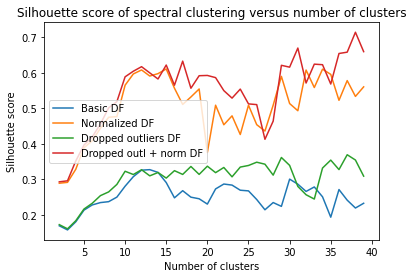

In [43]:
#Basic DF
scores = [metrics.silhouette_score(basic_df, SpectralClustering(n_clusters=i+2).fit(basic_df).labels_) 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Basic DF')

#Normalized DF
scores = [metrics.silhouette_score(norm_df, SpectralClustering(n_clusters=i+2).fit(norm_df).labels_, metric='cosine') 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Normalized DF')

#Dropped outliers DF
scores = [metrics.silhouette_score(dropoutl_df, SpectralClustering(n_clusters=i+2).fit(dropoutl_df).labels_) 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Dropped outliers DF')

#Normalized DF
scores = [metrics.silhouette_score(dropoutl_norm_df, SpectralClustering(n_clusters=i+2).fit(dropoutl_norm_df).labels_, metric='cosine') 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Dropped outl + norm DF')

plt.xlabel('Number of clusters')
plt.ylabel("Silhouette score")
plt.title("Silhouette score of spectral clustering versus number of clusters")

#### Agglomerative Clustering (Euclidean)

Text(0.5, 1.0, 'Silhouette score of euclidean agglomerative clustering versus number of clusters')

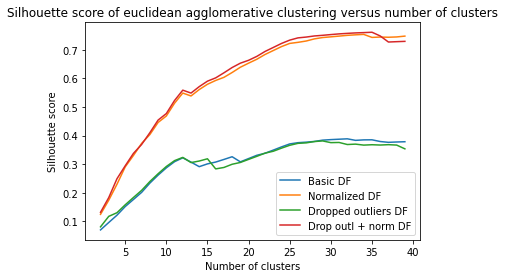

In [44]:
#Basic DF
scores = [metrics.silhouette_score(basic_df, AgglomerativeClustering(n_clusters=i+2).fit(basic_df).labels_) 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Basic DF')

#Normalized DF
scores = [metrics.silhouette_score(norm_df, AgglomerativeClustering(n_clusters=i+2).fit(norm_df).labels_, metric='cosine') 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Normalized DF')

#Dropped outliers DF
scores = [metrics.silhouette_score(dropoutl_df, AgglomerativeClustering(n_clusters=i+2).fit(dropoutl_df).labels_) 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Dropped outliers DF')

#Dropped outliers + normalized DF
scores = [metrics.silhouette_score(dropoutl_norm_df, AgglomerativeClustering(n_clusters=i+2).fit(dropoutl_norm_df).labels_, metric='cosine') 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Drop outl + norm DF')

plt.xlabel('Number of clusters')
plt.ylabel("Silhouette score")
plt.title("Silhouette score of euclidean agglomerative clustering versus number of clusters")

#### Agglomerative Clustering (Cosine)

Text(0.5, 1.0, 'Silhouette score of cosine agglomerative clustering versus number of clusters')

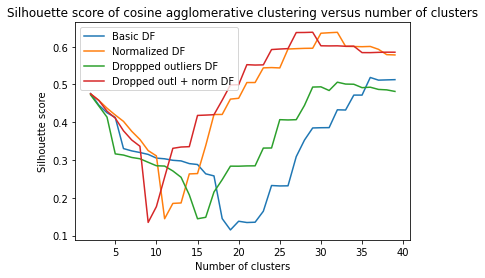

In [45]:
#Basic DF
scores = [metrics.silhouette_score(basic_df, AgglomerativeClustering(n_clusters=i+2, affinity='cosine', linkage='average')
                                   .fit(basic_df).labels_, metric='cosine') 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Basic DF')

#Normalized DF
scores = [metrics.silhouette_score(norm_df, AgglomerativeClustering(n_clusters=i+2, affinity='cosine', linkage='average')
                                   .fit(norm_df).labels_, metric='cosine') 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Normalized DF')

#Dropped outlers DF
scores = [metrics.silhouette_score(dropoutl_df, AgglomerativeClustering(n_clusters=i+2, affinity='cosine', linkage='average')
                                   .fit(dropoutl_df).labels_, metric='cosine') 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Droppped outliers DF')

#Dropped outliers + normalized DF
scores = [metrics.silhouette_score(dropoutl_norm_df, AgglomerativeClustering(n_clusters=i+2, affinity='cosine', linkage='average')
                                   .fit(dropoutl_norm_df).labels_, metric='cosine') 
          for i in range(38)]
sns.lineplot(x=np.arange(2, 40), y=scores, label='Dropped outl + norm DF')

plt.xlabel('Number of clusters')
plt.ylabel("Silhouette score")
plt.title("Silhouette score of cosine agglomerative clustering versus number of clusters")

### Results of optimal cluster count analysis

Looking at the results as on a whole, it can be noticed that unit normalized datasets produced better silhouette scores through-out the whole testing process. Plus, the difference in performance between the dataset which had outliers, versus the one without them, was relatively low. As such, to keep any information that might be pertained to the outlier observations, testing will be continued only on the **unit normalized dataset with outliers (*'df_norm'*)**.

In terms of specific algorithms, a couple will be chosen for further testing and visualization.
- **KMeans:** From the inertial elbow method, we can see that the optimal range of clusters is 20-25. Furthermore, the silhouette scores are pretty high overall, and we can see that they top off around 25 clusters. Which is the number of clusters we will test it further.
- **OPTICS:** The scores are pretty high and we can see that the optimal number of clusters here is 25. We will use this information for other algorithms too.
- **DBSCAN:** Considering DBSCAN is pretty similar to OPTICS, yet in this situation produced worse scores, we won't test it further.
- **Spectral Clustering:** The scores are relatively all over the place here, and low on average, so we will drop it.
- **Agglomerative Clustering (Euclidean):** This algorithm produces consistent scores that are high on average, so we will consider it further.
- **Agglomerative Clustering (Cosine):** Even though this algorithm produces rather low scores on average, what's interesting about it is the fact that it's the only algorithm that produced tolerable scores for only 2 clusters. In further testing, we will pit this against the *'User Liked'* labels.

To summarize, we will test and visualize **KMeans**, **OPTICS** and **Agglomerative Clustering with euclidean affinity** with 25 clusters, while we will test **Agglomerative Clustering with cosine affinity** with 2 clusters against our original data labels.

## Further testing

In this phase we will test the selected algorithms with a cluster count of 25, and we will score them to several different metrics. We will also play around a little bit with the different ways to silhouette scoring, and algorithm affinity.

In [46]:
#We will only test on one dataframe from now on
df_test = dfs_touse['df_norm']
X,Y = df_test.drop(columns=[target_column]), df_test[target_column]

In [47]:
#We will keep our testing results in a dictionary so we can display it later on with seaborn
testing_results = {}

#We will also keep our fitted models and predictions for further use
predictions = {}
fitted_models = {}

In [48]:
#Define testing methods
def test_clustering(model, X: pd.DataFrame, silh_metric: str = 'euclidean'):
    #Use model
    fitted_model = model.fit(X)
    pred_Y = fitted_model.labels_
    
    results = {}
    results['Silhouette Score'] = metrics.silhouette_score(X, fitted_model.labels_, metric=silh_metric)
    results['Calinski-Harabasz Score'] = metrics.calinski_harabasz_score(X, fitted_model.labels_)
    results['Davies-Boulding Score'] = metrics.davies_bouldin_score(X, fitted_model.labels_)
    
    return fitted_model, pred_Y, results

### KMeans

In [49]:
label = 'KMeans'

model, pred, res = test_clustering(KMeans(n_clusters=25), X, 'cosine')

testing_results[label] = res
predictions[label] = pred
fitted_models[label] = model

### OPTICS

In [50]:
label = 'Optics (Euclidean)'

model, pred, res = test_clustering(OPTICS(min_samples=30), X, 'euclidean')

testing_results[label] = res
predictions[label] = pred
fitted_models[label] = model

label = 'Optics (Cosine silhouette)'

model, pred, res = test_clustering(OPTICS(min_samples=30), X, 'cosine')

testing_results[label] = res
predictions[label] = pred
fitted_models[label] = model

label = 'Optics (Cosine)'

model, pred, res = test_clustering(OPTICS(min_samples=30, metric='cosine'), X, 'cosine')

testing_results[label] = res
predictions[label] = pred
fitted_models[label] = model

### Agglomerative Clustering

In [51]:
label = 'Agglomerative (Euclidean)'

model, pred, res = test_clustering(AgglomerativeClustering(n_clusters=25), X, 'euclidean')

testing_results[label] = res
predictions[label] = pred
fitted_models[label] = model

label = 'Agglomerative (Cosine silhouette)'

model, pred, res = test_clustering(AgglomerativeClustering(n_clusters=25), X, 'cosine')

testing_results[label] = res
predictions[label] = pred
fitted_models[label] = model

In [52]:
label = 'Agglomerative (Cosine)'

model, pred, res = test_clustering(AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average'), X, 'cosine')

cosine_agglomerative_res = res
predictions[label] = pred
fitted_models[label] = model

## Visualize the results

In [53]:
testing_df = pd.DataFrame.from_dict(testing_results, orient='index')

Text(0.5, 0.98, 'Scoring results against 25 clusters')

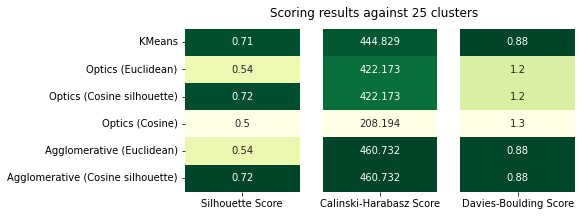

In [54]:
fig, axs = plt.subplots(figsize=(7,3), ncols=3)
sns.heatmap(testing_df[['Silhouette Score']], annot=testing_df[['Silhouette Score']], cmap="YlGn", cbar=False, ax=axs[0])
sns.heatmap(testing_df[['Calinski-Harabasz Score']], annot=testing_df[['Calinski-Harabasz Score']], cmap="YlGn", cbar=False, ax=axs[1], yticklabels=False, fmt='g')
sns.heatmap(testing_df[['Davies-Boulding Score']], annot=testing_df[['Davies-Boulding Score']], cmap="YlGn_r", cbar=False, ax=axs[2], yticklabels=False)

fig.suptitle("Scoring results against 25 clusters")

It seems that **Agglomerative Clustering** edges out **KMeans** by a little in the end, with **OPTICS** close behind them. Since the scores are so close, we will visualize all of them.

# Visualization using dimensionality reduction

We will use two dimensionality reduction techniques to help us visualize our clusters. Those being **PCA** and **t-SNE**.

In [55]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import animation

In [56]:
#Define functions to help us
def prepare_pca(n_components, data, labels):
    names = ['x', 'y', 'z']
    matrix = PCA(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = labels
    
    return df_matrix

def prepare_tsne(n_components, data, labels, metric):
    names = ['x', 'y', 'z']
    matrix = TSNE(n_components=n_components, learning_rate='auto', init='random', metric=metric, square_distances=True).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = labels
    
    return df_matrix

def plot_animation(df, label_column, name):
    def update(num):
        ax.view_init(200, num)

    N=360
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['x'], df['y'], df['z'], c=df[label_column],
               s=6, depthshade=True, cmap='Paired')
    plt.tight_layout()
    ani = animation.FuncAnimation(fig, update, N, blit=False, interval=50)
    ani.save('{}.gif'.format(name), writer='PillowWriter')
    plt.show()

## PCA

### KMeans

<AxesSubplot:xlabel='x', ylabel='y'>

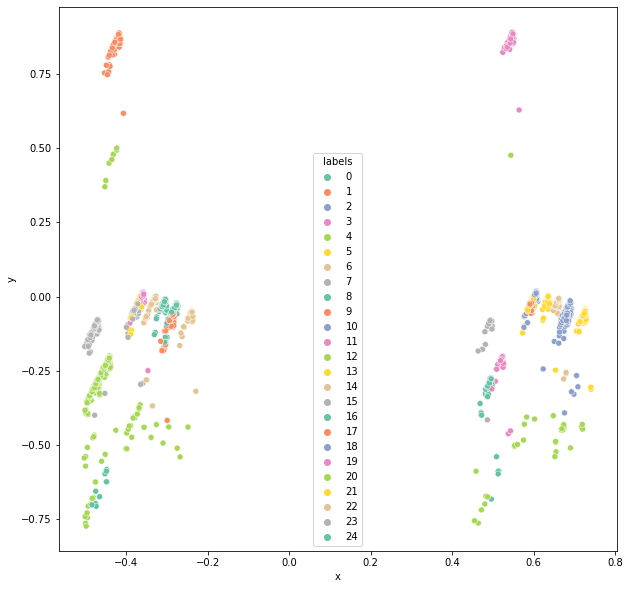

In [57]:
pca_kmeans = prepare_pca(2, X, predictions['KMeans'])

plt.figure(figsize=(10,10))
sns.scatterplot(x=pca_kmeans.x, y=pca_kmeans.y, hue=pca_kmeans.labels, palette="Set2")

MovieWriter PillowWriter unavailable; using Pillow instead.


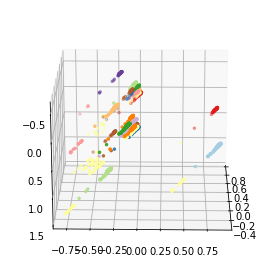

In [58]:
pca_kmeans = prepare_pca(3, X, predictions['KMeans'])

plot_animation(pca_kmeans, 'labels', 'KMeans')

### OPTICS

<AxesSubplot:xlabel='x', ylabel='y'>

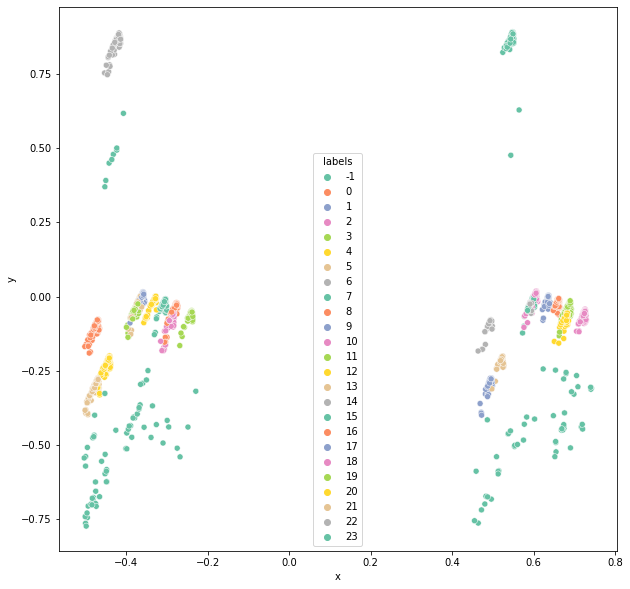

In [59]:
pca_optics = prepare_pca(2, X, predictions['Optics (Cosine silhouette)'])

plt.figure(figsize=(10,10))
sns.scatterplot(x=pca_optics.x, y=pca_optics.y, hue=pca_optics.labels, palette="Set2")

MovieWriter PillowWriter unavailable; using Pillow instead.


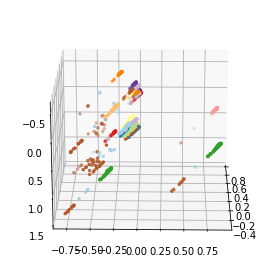

In [60]:
pca_optics = prepare_pca(3, X, predictions['Optics (Cosine silhouette)'])

plot_animation(pca_optics, 'labels', 'OPTICS')

### Agglomerative Clustering

<AxesSubplot:xlabel='x', ylabel='y'>

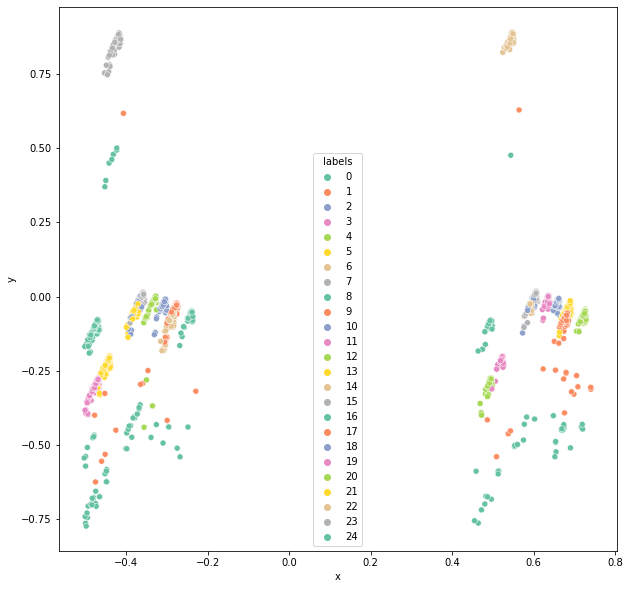

In [61]:
pca_agg = prepare_pca(2, X, predictions['Agglomerative (Cosine silhouette)'])

plt.figure(figsize=(10,10))
sns.scatterplot(x=pca_agg.x, y=pca_agg.y, hue=pca_agg.labels, palette="Set2")

MovieWriter PillowWriter unavailable; using Pillow instead.


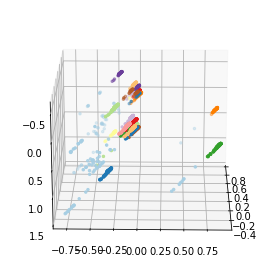

In [62]:
pca_agg = prepare_pca(3, X, predictions['Agglomerative (Cosine silhouette)'])

plot_animation(pca_agg, 'labels', 'Agglomerative Clustering')

### Labels seem oddly similar for all algorithms...

Due to how similar all these visualizations are, it occured that similarity between labels can be checked using **Rand Index**.

In [63]:
pred1 = predictions['Agglomerative (Cosine silhouette)']
pred2 = predictions['Optics (Cosine silhouette)']
pred3 = predictions['KMeans']

print(f'Similarity between agglomerative and optics: {metrics.rand_score(pred1, pred2)}')
print(f'Similarity between agglomerative and kmeans: {metrics.rand_score(pred1, pred3)}')
print(f'Similarity between kmeans and optics: {metrics.rand_score(pred3, pred2)}')

Similarity between agglomerative and optics: 0.9990886000739744
Similarity between agglomerative and kmeans: 0.997759618638399
Similarity between kmeans and optics: 0.9969259311723367


## t-SNE

### KMeans

<AxesSubplot:xlabel='x', ylabel='y'>

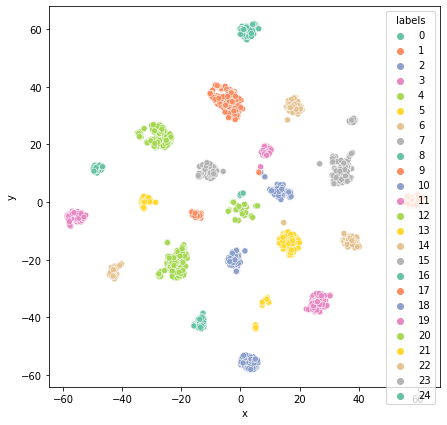

In [64]:
tsne_kmeans = prepare_tsne(2, X, predictions['KMeans'], 'cosine')

plt.figure(figsize=(7,7))
sns.scatterplot(x=tsne_kmeans.x, y=tsne_kmeans.y, hue=tsne_kmeans.labels, palette="Set2")

MovieWriter PillowWriter unavailable; using Pillow instead.


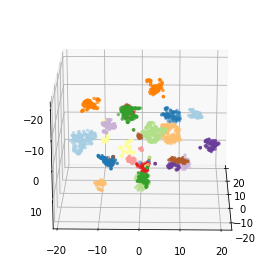

In [65]:
tsne_kmeans = prepare_tsne(3, X, predictions['KMeans'], 'cosine')

plot_animation(tsne_kmeans, 'labels', 'KMeans TSNE')

### OPTICS

<AxesSubplot:xlabel='x', ylabel='y'>

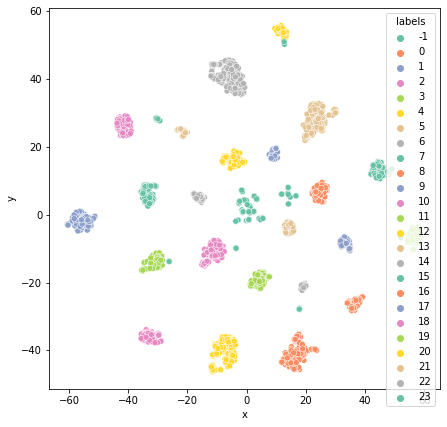

In [66]:
tsne_optics = prepare_tsne(2, X, predictions['Optics (Cosine silhouette)'], 'cosine')

plt.figure(figsize=(7,7))
sns.scatterplot(x=tsne_optics.x, y=tsne_optics.y, hue=tsne_optics.labels, palette="Set2")

MovieWriter PillowWriter unavailable; using Pillow instead.


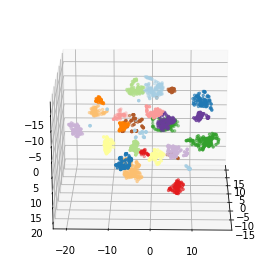

In [67]:
tsne_optics = prepare_tsne(3, X, predictions['Optics (Cosine silhouette)'], 'cosine')

plot_animation(tsne_optics, 'labels', 'Optics TSNE')

### Agglomerative Clustering

<AxesSubplot:xlabel='x', ylabel='y'>

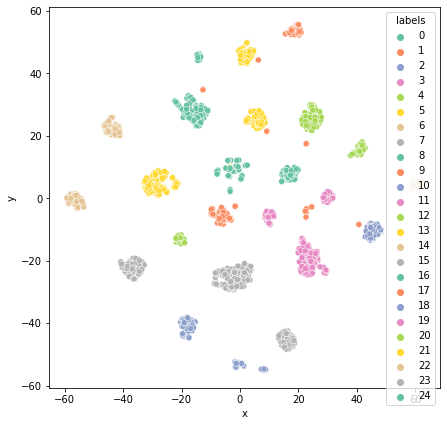

In [68]:
tsne_agg = prepare_tsne(2, X, predictions['Agglomerative (Cosine silhouette)'], 'cosine')

plt.figure(figsize=(7,7))
sns.scatterplot(x=tsne_agg.x, y=tsne_agg.y, hue=tsne_agg.labels, palette="Set2")

MovieWriter PillowWriter unavailable; using Pillow instead.


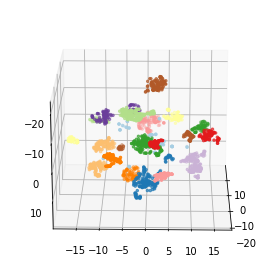

In [69]:
tsne_agg = prepare_tsne(3, X, predictions['Agglomerative (Cosine silhouette)'], 'cosine')

plot_animation(tsne_agg, 'labels', 'Agglomerative Clustering TSNE')

#### Effect of removing outliers

In [70]:
X_dropoutl = dfs_touse['df_dropoutl_norm'].drop(columns=[target_column])

model, pred, res = test_clustering(AgglomerativeClustering(n_clusters=25), X_dropoutl, 'cosine')

<AxesSubplot:xlabel='x', ylabel='y'>

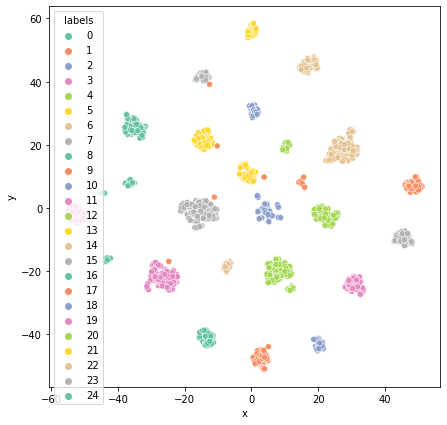

In [71]:
tsne_agg = prepare_tsne(2, X_dropoutl, pred, 'cosine')

plt.figure(figsize=(7,7))
sns.scatterplot(x=tsne_agg.x, y=tsne_agg.y, hue=tsne_agg.labels, palette="Set2")

MovieWriter PillowWriter unavailable; using Pillow instead.


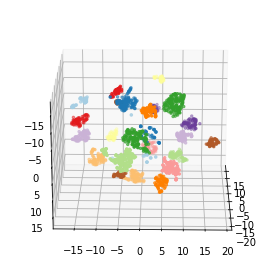

In [72]:
tsne_agg = prepare_tsne(3, X_dropoutl, pred, 'cosine')

plot_animation(tsne_agg, 'labels', 'Agglomerative Clustering without outliers TSNE')

## Analysis

### Cluster correlation heatmap

In [73]:
df_withlabels = X.copy()
df_withlabels['cluster'] = predictions['Agglomerative (Cosine silhouette)']
corr = df_withlabels.corr()

<AxesSubplot:>

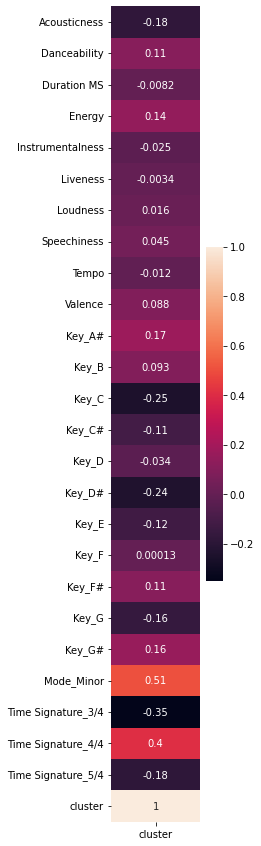

In [81]:
plt.figure(figsize=(2,15))
sns.heatmap(data=corr[['cluster']], annot=True)

### Cluster features

Let's split the groups up and see how the different clusters compare based on individual features.

In [89]:
df['cluster'] = predictions['Agglomerative (Cosine silhouette)']

In [127]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
categorical_features = df.select_dtypes(exclude='number').columns.tolist()

In [129]:
gb = df.groupby(by='cluster')
counts = gb.size()
counts_df = counts.reset_index(name='counts').set_index(keys='cluster')
counts_df.sort_values(by='counts', ascending=False)

,counts
cluster,
7,167
3,153
5,145
8,141
12,102
23,100
0,92
13,85
17,80


In [101]:
df[numerical_features].groupby(by='cluster').mean()

,Acousticness,Danceability,Duration MS,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
cluster,,,,,,,,,,
0,0.466633,0.456696,260577.489130,0.446996,0.236810,0.192989,-10.512967,0.065058,130.053837,0.298051
1,0.236052,0.476806,236524.000000,0.603026,0.077579,0.238200,-8.181097,0.174252,120.133032,0.429558
2,0.300614,0.580508,255249.898305,0.650020,0.191762,0.182753,-7.722492,0.053459,116.044949,0.469322
3,0.197255,0.632536,238929.535948,0.662612,0.129546,0.183168,-7.352954,0.086456,116.889621,0.516539
4,0.307643,0.579943,207150.962264,0.638289,0.054256,0.209438,-7.300566,0.067175,123.751094,0.554140
5,0.179899,0.626710,237482.827586,0.693261,0.126332,0.210086,-6.961814,0.093095,121.285883,0.528999
6,0.256268,0.590920,251218.213333,0.644505,0.145150,0.188171,-7.733173,0.078336,112.692813,0.463887
7,0.166167,0.637964,243005.143713,0.695531,0.110118,0.170399,-6.728701,0.107105,122.203102,0.499411
8,0.170731,0.615234,241518.148936,0.672560,0.119014,0.178543,-7.030525,0.096356,118.953652,0.466080


<AxesSubplot:ylabel='cluster'>

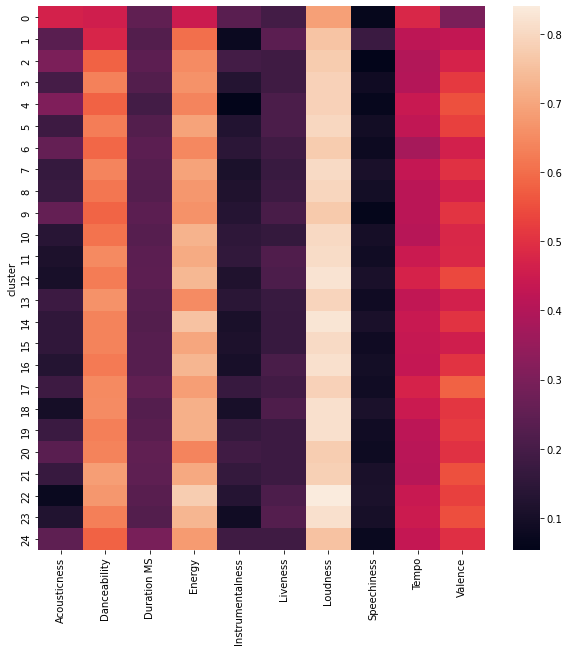

In [112]:
scaled_values = minmax_scale(df, ['Tempo','Loudness','Duration MS'])
scaled_mean = scaled_values[numerical_features].groupby(by='cluster').mean()

plt.figure(figsize=(10,10))
sns.heatmap(data=scaled_mean)

Even though we've scaled the numerical values, it's tough to distinguish any real information from either the heatmap or the tabular view.

In [132]:
disc_df = discretize(df)
cat_gb = disc_df[categorical_features + ['Speechiness','Liveness','Instrumentalness','cluster']].groupby(by='cluster')
cat_gb_modes = cat_gb.agg(pd.Series.mode)
cat_gb_modes['Counts'] = counts_df['counts']
cat_gb_modes.head(25)

,Key,Mode,Time Signature,User Liked,Speechiness,Liveness,Instrumentalness,Counts
cluster,,,,,,,,
0,C,Major,3/4,No,Music,No,No,92
1,"[B, C, G]",Minor,5/4,No,Music,No,No,31
2,D#,Major,4/4,No,Music,No,No,59
3,C,Major,4/4,No,Music,No,No,153
4,E,Major,4/4,No,Music,No,No,53
5,G,Major,4/4,Yes,Music,No,No,145
6,F,Major,4/4,No,Music,No,No,75
7,C#,Major,4/4,No,Music,No,No,167
8,D,Major,4/4,Yes,Music,No,No,141


This table confirms what we might have inferred from the correlation values. There are two specific clusters for the rarer time signatures, and then the rest are different combinations of modes and keys.

## Cosine agglomerative clustering against 'User Liked'

In [123]:
model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average').fit(X)
pred_Y = model.labels_

In [124]:
rand_score = metrics.adjusted_rand_score(Y, pred_Y)
mutual_info_score = metrics.adjusted_mutual_info_score(Y, pred_Y)
v_score = metrics.v_measure_score(Y, pred_Y)
fm_score = metrics.fowlkes_mallows_score(Y, pred_Y)

print("Scores for cosine agglomerative slutering against 'User Liked' labels:")
print(f"Adjusted rand index: {rand_score:.2f}")
print(f"Adjusted mutual info score: {mutual_info_score:.2f}")
print(f"V-Measure score: {v_score:.2f}")
print(f"Fowlkes-Mallows score: {fm_score:.2f}")

Scores for cosine agglomerative slutering against 'User Liked' labels:
Adjusted rand index: 0.00
Adjusted mutual info score: 0.00
V-Measure score: 0.00
Fowlkes-Mallows score: 0.67


As we can see, the two generated clusters have no corresponding to the actual 'User Liked' labels.